<a href="https://colab.research.google.com/github/Aarav77/Clock/blob/master/velocityescape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data=files.upload()

Saving escape_velocity.csv to escape_velocity.csv


In [3]:
import pandas as pd

import plotly.express as px
df=pd.read_csv("escape_velocity.csv")
velocity=df["Velocity"].tolist()
escape=df["Escaped"].tolist()
fig=px.scatter(x=velocity, y=escape)
fig.show()

In [4]:
import numpy as np
velocityArray=np.array(velocity)
escapeArray=np.array(escape)
m,c=np.polyfit(velocityArray, escapeArray, 1)
y=[]
for x in velocityArray:
  yvalue=m*x+c
  y.append(yvalue)
fig=px.scatter(x=velocityArray, y=escapeArray)
fig.update_layout(shapes=[dict(type='line', y0=min(y), y1=max(y), x0=min(velocityArray), x1=max(velocityArray))])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



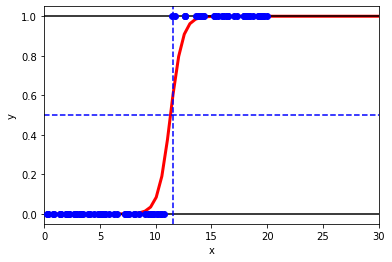

11.557788944723617


In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X=np.reshape(velocity, (len(velocity), 1))
Y=np.reshape(escape, (len(escape), 1))
lr=LogisticRegression()
lr.fit(X, Y)
plt.figure()
plt.scatter(X.ravel(), Y, color='blue', zorder=20)
def model(x):
  return 1/(1+np.exp(-x))
Xtest=np.linspace(0, 100, 200)
#change 0, 5000, 10000 int 0, 100, 200
escapechance=model(Xtest*lr.coef_+lr.intercept_).ravel()
plt.plot(Xtest, escapechance, color='red', linewidth=3)
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=1, color='k', linestyle='-')
plt.axhline(y=0.5, color='b', linestyle='--')
plt.axvline(x=Xtest[23], color='b', linestyle='--')
#68433 into 23
plt.ylabel('y')
plt.xlabel('x')
plt.xlim(0, 30)
#3400, 3450 into 0, 30
plt.show()
print(Xtest[23])

In [6]:
myvelocity=float(input("Enter Your Velocity: "))
#enter yor velocity
chances=model(myvelocity*lr.coef_+lr.intercept_).ravel()[0]
if chances<=0.01:
  print("object will not escape the orbit")
elif chances>=1:
  print("object will escape the orbit")
elif chances<0.5:
  print("object may not escape the orbit")
else:
  print("object may escape the orbit")
  #tungsten=object melt=escape the orbit

Enter Your Velocity: 100
object will escape the orbit
